In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Loading data and concatenating datagrames into single dataframe
df_loans2018Q3 = pd.read_csv('C:/Users/ramie/Desktop/dv01 Loan Data/csv/LoanStats_securev1_2018Q3.csv', dtype={'0': int})
df_loans2018Q4 = pd.read_csv('C:/Users/ramie/Desktop/dv01 Loan Data/csv/LoanStats_securev1_2018Q4.csv', dtype={'0': int})
df_loans2019Q1 = pd.read_csv('C:/Users/ramie/Desktop/dv01 Loan Data/csv/LoanStats_securev1_2019Q1.csv', dtype={'0': int}, low_memory=False)

df_loans = pd.concat([df_loans2018Q3, df_loans2018Q4, df_loans2019Q1])
df_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,140736622,NaN,30000,30000,30000.0,36 months,18.94%,1098.78,D,D2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,141088786,NaN,8400,8400,8400.0,36 months,17.97%,303.56,D,D1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,141101758,NaN,10000,10000,10000.0,36 months,6.11%,304.72,A,A1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,141110059,NaN,10000,10000,10000.0,36 months,6.67%,307.27,A,A2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,141110722,NaN,10000,10000,10000.0,36 months,7.21%,309.74,A,A3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Checking null values

pd.isnull(df_loans).sum()

id                            0
member_id                372281
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                          ...  
settlement_status        370674
settlement_date          370674
settlement_amount        370674
settlement_percentage    370674
settlement_term          370674
Length: 150, dtype: int64

In [4]:
# Checking for total number of rows and columns in dataset, datatypes, and memory usage
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372281 entries, 0 to 115674
Columns: 150 entries, id to settlement_term
dtypes: float64(57), int64(56), object(37)
memory usage: 428.9+ MB


In [5]:
# Adding Loan_Status_Category as a column to determine Status of Loans
conditions = [
    (df_loans['loan_status'].isin(['Fully Paid', 'Current', 'In Grace Period'])),
    (df_loans['loan_status'].isin(['Late (16-30 days)', 'Late (31-120 days)'])),
    (df_loans['loan_status'].isin(['Charged Off', 'Default']))
]
values = ['Good Standing', 'Late', 'Not in Good Standing']

df_loans['loan_status_category'] = np.select(conditions, values, default='Unknown')

print(df_loans['loan_status_category'].head())

0    Not in Good Standing
1    Not in Good Standing
2           Good Standing
3           Good Standing
4           Good Standing
Name: loan_status_category, dtype: object


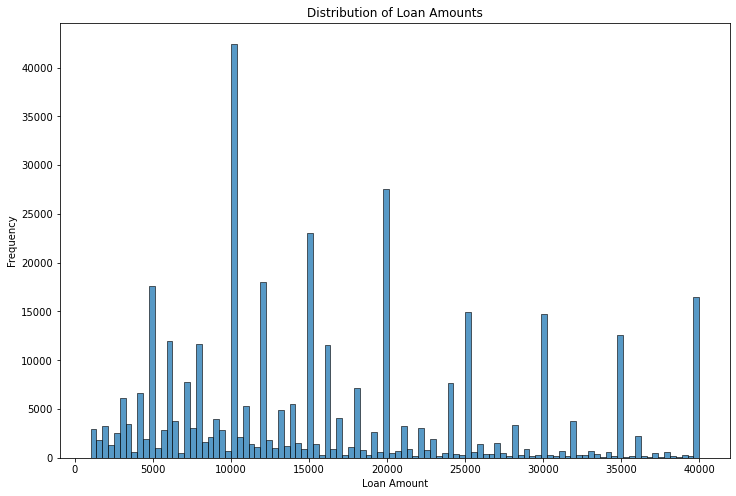

In [21]:
#Distribution of Loan Amounts
plt.figure(figsize=(12, 8))
sns.histplot(df_loans['loan_amnt'], kde=False)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

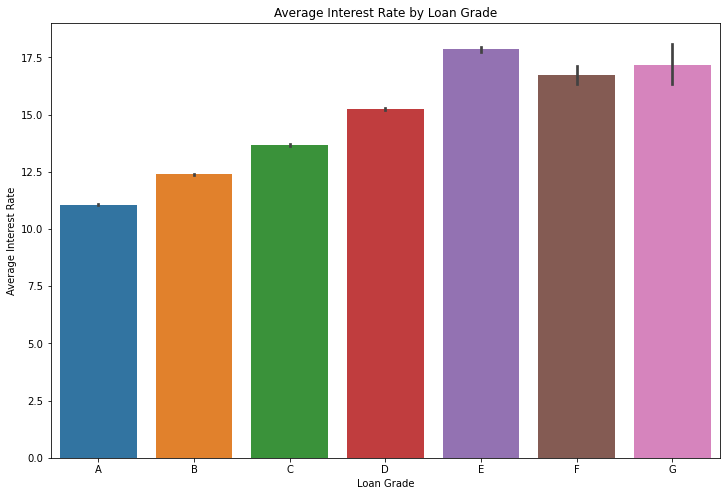

In [16]:
# Displaying Average Interest Rate by Loan Grades
df_loans['int_rate'] = df_loans['int_rate'].round(decimals=0).astype(int)

df_loans.sort_values("grade", inplace=True)
df_loans['grade'] = df_loans['grade'].astype(str)

plt.figure(figsize=(12, 8))
sns.barplot(x='grade', y='int_rate', data=df_loans, estimator=np.mean)
plt.xlabel('Loan Grade')
plt.ylabel('Average Interest Rate')
plt.title('Average Interest Rate by Loan Grade')
plt.show()

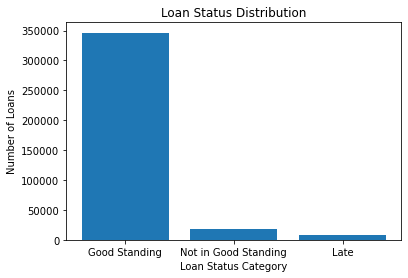

In [26]:
# Counting the occurrences of each loan status category
status_counts = df_loans['loan_status_category'].value_counts()

plt.bar(status_counts.index, status_counts.values)
plt.xlabel('Loan Status Category')
plt.ylabel('Number of Loans')
plt.title('Loan Status Distribution')
plt.show()

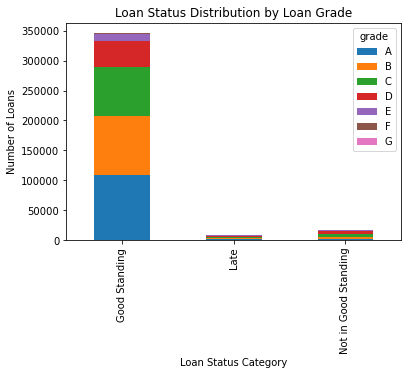

In [23]:
# Categorizing loan status by good standing, late, or not in good standing
good_standing = ['Fully Paid', 'Current', 'In Grace Period']
late = ['Late (16-30 days)', 'Late (31-120 days)']
not_good_standing = ['Charged Off', 'Default']
df_loans['loan_status_category'] = df_loans['loan_status'].apply(lambda x: 'Good Standing' if x in good_standing else ('Late' if x in late else 'Not in Good Standing'))

status_counts = df_loans.groupby(['loan_status_category', 'grade']).size().reset_index(name='counts')
status_counts_pivot = status_counts.pivot(index='loan_status_category', columns='grade', values='counts')
status_counts_pivot.plot(kind='bar', stacked=True)

plt.xlabel('Loan Status Category')
plt.ylabel('Number of Loans')
plt.title('Loan Status Distribution by Loan Grade')
plt.show()

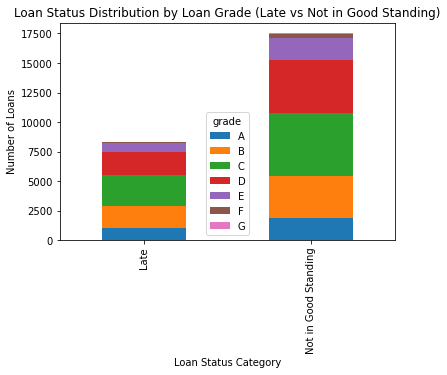

In [22]:
# A better view of Late/Good Standing
good_standing = ['Fully Paid', 'Current', 'In Grace Period']
late = ['Late (16-30 days)', 'Late (31-120 days)']
not_good_standing = ['Charged Off', 'Default']
df_loans['loan_status_category'] = df_loans['loan_status'].apply(lambda x: 'Good Standing' if x in good_standing else ('Late' if x in late else 'Not in Good Standing'))

status_counts = df_loans.groupby(['loan_status_category', 'grade']).size().reset_index(name='counts')
status_counts = status_counts[status_counts['loan_status_category'] != 'Good Standing']
status_counts_pivot = status_counts.pivot(index='loan_status_category', columns='grade', values='counts')
status_counts_pivot.plot(kind='bar', stacked=True)

plt.xlabel('Loan Status Category')
plt.ylabel('Number of Loans')
plt.title('Loan Status Distribution by Loan Grade (Late vs Not in Good Standing)')
plt.show()